In [1]:
# 导入一些必要的包

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

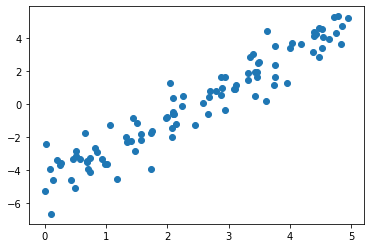

In [2]:
# 复习矩阵的创建
a = np.array([[1,2],[3,4]])
m = np.mat(a)    # NumPy中创建矩阵需要使用mat函数，该函数需要输入二维数组

# 模拟一些数据，并且加上随机性
rng = np.random.RandomState(1)     # 设置随机数种子
x = 5*rng.rand(100)                        # 100个[0,5)的随机数
y = 2*x-5+rng.randn(100)            # 真实规律的标签取值
plt.scatter(x,y)


# 可以尝试将数据变成DataFrame

In [3]:
data = pd.DataFrame({'x' : x, 'label' : y})
data.head()

,x,label
0,2.085110,-0.514145
1,3.601622,0.181044
2,0.000572,-5.305060
3,1.511663,-1.148700
4,0.733779,-3.302346


In [4]:
a = np.array([[1,2],[2,3],[3,4]])
b = np.array([1, 1, 1])
b_new = b.reshape(-1,1)
np.hstack((b_new, a))

array([[1, 1, 2],
       [1, 2, 3],
       [1, 3, 4]])

In [5]:
#if i == 0:
i = 0
i == 1

False

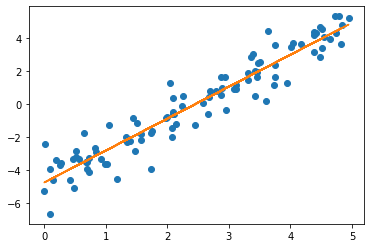

In [6]:
# 创建一个函数来做最小二乘

#可以设置fit_intercept = True， 后期可以写成一个函数
fit_intercept = True

# 取出X和Y的值，准备开始写回归公式
X = data.iloc[:, :-1]
Y = data.iloc[:, -1]

#如果fit_intercept = True的话，X前面需要加上一个1例
if fit_intercept:
    ones = np.ones((X.shape[0],1))
    X = np.hstack((ones, X))
    
# 转换成matrix， 注意Y的格式，是一列
X = np.mat(X)
Y = np.mat(Y).T

# 计算参数w
w = (X.T * X).I * X.T * Y

# 预测这个数据
Y_pred = X * w

# 预测数据并且画出最后的结果
plt.plot(X[:, 1], Y, 'o')
plt.plot(X[:, 1], Y_pred)

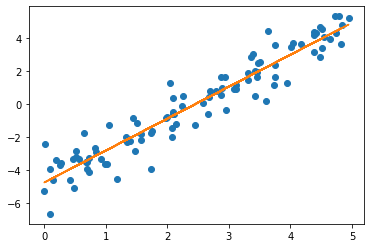

In [7]:
#把上面的步骤写成函数
def LR_frank(X, Y, fit_intercept = True):
    if fit_intercept:
        ones = np.ones((X.shape[0],1))
        X = np.hstack((ones, X))
    X = np.mat(X)
    Y = np.mat(Y).T

    w = (X.T * X).I * X.T * Y
    Y_pred = X * w
    return X, Y, w, Y_pred
    
#测试函数是否可以运行
X = data.iloc[:, :-1]
Y = data.iloc[:, -1]
X, Y, w, Y_pred = LR_frank(X, Y)

plt.plot(X[:, -1], Y, 'o')
plt.plot(X[:, -1], Y_pred)

In [8]:
# 尝试使用SSE评价指标
# 矩阵的形式计算SSE
# np.array((Y - Y_pred).T * (Y - Y_pred))[0][0]

# 简单的形式计算SSE
SSE = np.power(Y - Y_pred, 2).sum()
SSE

#算出MSE
MSE = SSE / X.shape[0]

#算出SST
SST = Y.var() * X.shape[0]

#算出R^2
1 - SSE/SST

0.9104352692515009

In [9]:
#手写一个类似sklearn的回归
class linear_reg:
    def __init__(self,
                 fit_intercept = True
                ):
        self.fit_intercept = fit_intercept
    
    def fit(self, X, Y,):
        if self.fit_intercept:
            ones = np.ones((X.shape[0],1))
            X = np.hstack((ones,X))
        self.X = np.mat(X)
        self.Y = np.mat(Y).T
        
        theta = (self.X.T * self.X).I * self.X.T * self.Y
        self.coef_ = np.ravel(theta)[1:]
        self.intercept_ = np.ravel(theta)[0]
        self.theta = theta
    
    def predict(self, X):
        if self.fit_intercept:
            ones = np.ones((X.shape[0],1))
            X = np.hstack((ones,X))
        return np.mat(X) * self.theta
    
    def score(self, Xtest, Ytest):
        Y_pred = self.predict(Xtest)
        Ytest = np.mat(Ytest).T
        SSE = (Ytest - Y_pred).T * (Ytest - Y_pred)
        SSE = np.array(SSE).ravel()[0] / X.shape[0]
        SST = np.var(Ytest)
        R_square = 1 - SSE/SST
        return R_square

model_frank = linear_reg()
X = data.iloc[:, :-1]
Y = data.iloc[:, -1]
model_frank.fit(X, Y)
model_frank.score(X, Y), model_frank.intercept_, model_frank.coef_

(0.9104352692515009, -4.763042745851086, array([1.93698502]))

In [10]:
# sklearn实现
from sklearn.linear_model import LinearRegression
X = data.iloc[:, :-1]
Y = data.iloc[:, -1]

reg = LinearRegression()
reg.fit(X, Y)

# 查看一些重要的接口以及其指标
reg.coef_, reg.intercept_


(array([1.93698502]), -4.763042745851092)

In [11]:
# 预测以及评估指标,.score给出的是R平方的结果
reg.score(X, Y)

0.910435269251501

In [12]:
# 使用sklearn里面的包来做相应的回归类算法的评估
from sklearn.metrics import mean_squared_error, r2_score

# 首先要预测出标签
Y_pred = reg.predict(X)

# 将预测标签和真实标签一同放入包内

mean_squared_error(Y, Y_pred), r2_score(Y, Y_pred)

(0.799761865601158, 0.910435269251501)

In [13]:
lam = 0.3
np.mat(lam * np.eye(10))

matrix([[0.3, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0.3, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0.3, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0.3, 0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0.3, 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0.3, 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. , 0.3, 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.3, 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.3, 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.3]])

In [14]:
# Ridge回归

#把上面LR函数的步骤写成函数
#把上面的步骤写成函数
def Ridge_LR_frank(X, Y, alpha = 0.1, 
             fit_intercept = True):
    if fit_intercept:
        ones = np.ones((X.shape[0],1))
        X = np.hstack((ones, X))
    X = np.mat(X)
    Y = np.mat(Y).T

    lam_eye = np.mat(alpha * np.eye(X.shape[1]))
    w = (X.T * X + lam_eye).I * X.T * Y
    Y_pred = X * w
    return X, Y, w, Y_pred
    
#测试函数是否可以运行
X = data.iloc[:, :-1]
Y = data.iloc[:, -1]
X, Y, w, Y_pred = Ridge_LR_frank(X, Y)

#plt.plot(X[:, -1], Y, 'o')
#plt.plot(X[:, -1], Y_pred)


#测试函数是否可以运行


In [27]:
# 读取abalone.csv数据来尝试
data = pd.read_csv('abalone.txt',header=None,sep='\t')
data.columns=['性别','长度','直径','高度','整体重量','肉重量','内脏重量','壳重','年龄']   # 补充
data.head()

X = data.iloc[:, :-1]
Y = data.iloc[:, -1]

# 使用原始的
X1, Y1, w, Y_pred = LR_frank(X, Y)

# 使用手写Ridge的
X2, Y2, w_ridge, Y_pred_ridge = Ridge_LR_frank(X, Y, alpha = 0.2)

# 使用sklearnRidge
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.2)
ridge.fit(X, Y)

Ridge(alpha=0.2)

In [16]:
# 原始的线性模型
np.array(w).ravel()
r2_score(Y_pred, Y), mean_squared_error(Y_pred, Y)

(0.10566931101737853, 4.906524345190111)

In [17]:
# 自己写的Ridge
print(np.around(np.array(w_ridge).ravel(), 2))
r2_score(Y_pred_ridge, Y),mean_squared_error(Y_pred_ridge, Y)

[  3.     0.06  -0.02  11.45  11.06   8.72 -19.71  -8.9    9.19]


(0.09119274470725691, 4.908888764868644)

In [18]:
# sklearn Ridge
print(ridge.coef_)
print(ridge.intercept_)
Y_sk_pred = ridge.predict(X)
r2_score(Y_sk_pred, Y),mean_squared_error(Y_sk_pred, Y)

[  0.06156109  -0.03945719  11.44686599  11.05067799   8.72212668
 -19.70755072  -8.8949646    9.19236679]
3.005201531224067


(0.09085790602512467, 4.9089008736893565)

In [30]:
X

,性别,长度,直径,高度,整体重量,肉重量,内脏重量,壳重
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,-1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,-1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [39]:
ridge = Ridge(alpha = 700000).fit(X, Y)
ridge.coef_

array([-0.00054506,  0.00128363,  0.00109499,  0.00044777,  0.00508697,
        0.00179242,  0.00106003,  0.00167755])

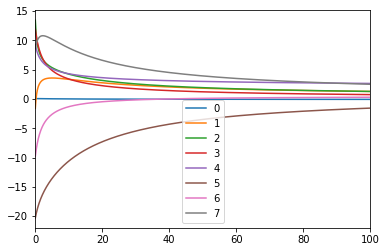

In [19]:
# 尝试看一下不断增大lam的值，观察theta的表现
l_alpha = np.linspace(0, 100, 1000)
#记录每一个lam所对应的各个theta的值
l_w = []

for i in l_alpha:
    ridge = Ridge(alpha = i)
    ridge.fit(X, Y)
    l_theta.append(ridge.coef_)

pd.DataFrame(l_w, index = l_alpha).plot()

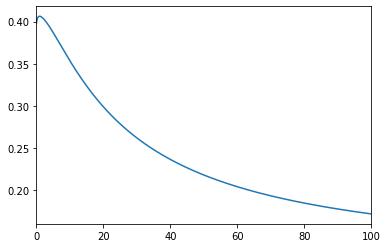

In [20]:
from sklearn.model_selection import cross_val_score

l_alpha = np.linspace(0, 100, 1000)
#记录每一个lam所对应的各个theta的值
l_r2 = []

for i in l_alpha:
    ridge = Ridge(alpha = i)
    s = cross_val_score(ridge, X, Y, cv = 5).mean()
    l_r2.append(s)

pd.Series(l_r2, index = l_alpha).plot()

In [45]:
ridge = Ridge(alpha = 1).fit(X, Y)
ridge.coef_

array([  0.05442389,   2.29218582,   8.29912646,   8.76164441,
         7.33823982, -17.97861468,  -6.51700981,  10.39786634])

In [48]:
# 尝试使用sklearn的Lasso
from sklearn.linear_model import Lasso

# 还是使用alpha = 0.2
lasso = Lasso(alpha = 0.009).fit(X, Y)

#查看参数
lasso.coef_

array([  0.02137186,   0.        ,   8.18597082,   0.        ,
         4.86409485, -14.45944109,  -0.        ,  12.77128623])

In [24]:
alpha_list = np.linspace(0,0.05,100)
l_theta = []

In [58]:
# 房屋数据集

import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing as fch
import matplotlib.pyplot as plt

housevalue = fch()

X = pd.DataFrame(housevalue.data)
y = housevalue.target
X.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目"
            ,"平均卧室数目","街区人口","平均入住率","街区的纬度","街区的经度"]

In [53]:
# 切分数据集
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state=420)

In [74]:
# 使用Linear来进行拟合

Linear = LinearRegression().fit(Xtrain, Ytrain)
Linear.score(Xtrain, Ytrain), Linear.score(Xtest, Ytest)

# 使用Ridge来拟合

ridge = Ridge(alpha = 100).fit(Xtrain, Ytrain)
ridge.score(Xtrain, Ytrain), ridge.score(Xtest, Ytest)

# 使用Lasso来进行拟合
lasso = Lasso(alpha = 0.1).fit(Xtrain, Ytrain)
lasso.score(Xtrain, Ytrain), lasso.score(Xtest, Ytest)

(0.5461342410804206, 0.5368702511716803)

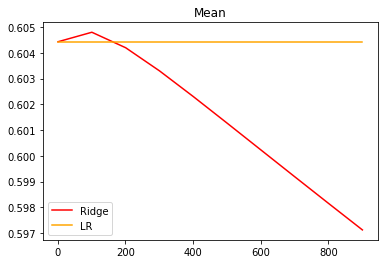

In [71]:
# 交叉验证下，与线性回归相比，岭回归的结果如何变化？
alpharange = np.arange(1,1001,100)
ridge, lr = [], []

for i in alpharange:
    ridge_model = Ridge(alpha = i)
    linear_model = LinearRegression()
    
    ridge_score = cross_val_score(ridge_model, Xtrain, Ytrain, cv = 5, scoring = 'r2').mean()
    linear_score =cross_val_score(linear_model, Xtrain,Ytrain, cv = 5, scoring = 'r2').mean()
    
    ridge.append(ridge_score)
    lr.append(linear_score)

plt.plot(alpharange,ridge,color="red",label="Ridge")
plt.plot(alpharange,lr,color="orange",label="LR")
plt.title("Mean")
plt.legend()
plt.show()

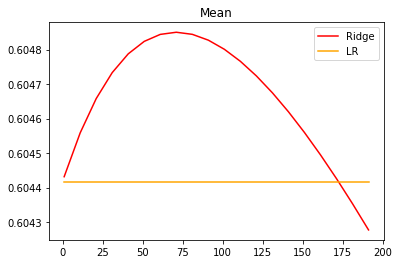

In [72]:
alpharange = np.arange(1,200,10)
ridge, lr = [], []

for i in alpharange:
    ridge_model = Ridge(alpha = i)
    linear_model = LinearRegression()
    
    ridge_score = cross_val_score(ridge_model, Xtrain, Ytrain, cv = 5, scoring = 'r2').mean()
    linear_score =cross_val_score(linear_model, Xtrain,Ytrain, cv = 5, scoring = 'r2').mean()
    
    ridge.append(ridge_score)
    lr.append(linear_score)

plt.plot(alpharange,ridge,color="red",label="Ridge")
plt.plot(alpharange,lr,color="orange",label="LR")
plt.title("Mean")
plt.legend()
plt.show()

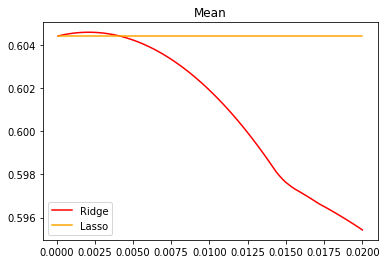

In [80]:
# 交叉验证下，与线性回归相比，岭回归的结果如何变化？
alpharange = np.linspace(0.0001,0.02, 100)
lasso, lr = [], []

for i in alpharange:
    lasso_model = Lasso(alpha = i)
    linear_model = LinearRegression()
    
    lasso_score = cross_val_score(lasso_model, Xtrain, Ytrain, cv = 5, scoring = 'r2').mean()
    linear_score =cross_val_score(linear_model, Xtrain,Ytrain, cv = 5, scoring = 'r2').mean()
    
    lasso.append(lasso_score)
    lr.append(linear_score)

plt.plot(alpharange,lasso,color="red",label="Ridge")
plt.plot(alpharange,lr,color="orange",label="Lasso")
plt.title("Mean")
plt.legend()
plt.show()

In [83]:
pd.Series(lasso, index = alpharange).idxmax()

0.00211010101010101

In [84]:
# 找到最优的参数之后，查看这些最优的参数在测试集下的表现

lasso = Lasso(alpha = 0.00211010101010101).fit(Xtrain, Ytrain)
lasso.score(Xtrain, Ytrain), lasso.score(Xtest, Ytest)

ridge = Ridge(alpha = 71).fit(Xtrain, Ytrain)
ridge.score(Xtrain, Ytrain), ridge.score(Xtest, Ytest)

In [87]:
lasso.coef_

array([ 4.29732122e-01,  1.03650588e-02, -9.30028818e-02,  5.50411142e-01,
        1.15847110e-06, -3.31889016e-03, -4.10405349e-01, -4.22343666e-01])

In [93]:
# 尝试对coef做学习曲线，观测在不断加大惩罚的过程当中，各个参数值的变化情况
# 如果出现波浪形的线，就有共线性存在，但是不确定到底是哪几个特征有共线性
ridge_coef = []

alpharange = np.arange(0, 10000)
for i in alpharange:
    ridge = Ridge(alpha = i).fit(Xtrain, Ytrain)
    ridge_coef.append(ridge.coef_)

pd.DataFrame(ridge_coef).plot()

In [119]:
# data = pd.read_csv('abalone.txt',header=None,sep='\t')
# data.columns=['性别','长度','直径','高度','整体重量','肉重量','内脏重量','壳重','年龄']   # 补充
# data.head()

# X = data.iloc[:, :-1]
# Y = data.iloc[:, -1]

In [130]:
# from sklearn.datasets import load_boston

# boston = load_boston()
# X = boston.data
# Y = boston.target

In [134]:
housevalue = fch()

X = pd.DataFrame(housevalue.data)
Y = housevalue.target
X.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目"
            ,"平均卧室数目","街区人口","平均入住率","街区的纬度","街区的经度"]

In [135]:
from sklearn.preprocessing import StandardScaler

X_ = StandardScaler().fit_transform(X)

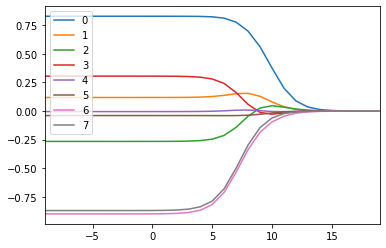

In [136]:
# 尝试看一下不断增大lam的值，观察theta的表现
l_alpha = np.array(range(1, 30))
#记录每一个lam所对应的各个theta的值
l_w = []

for i in l_alpha:
    ridge = Ridge(alpha = np.exp(i - 10))
    ridge.fit(X_, Y)
    l_w.append(ridge.coef_)

pd.DataFrame(l_w, index = l_alpha - 10).plot()

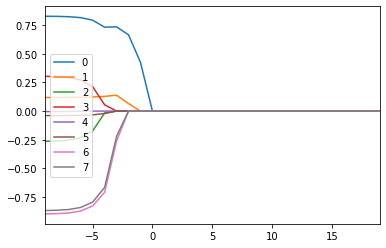

In [137]:
# 尝试看一下不断增大lam的值，观察w的表现
l_alpha = np.array(range(1, 30))
#记录每一个lam所对应的各个theta的值
l_w = []

for i in l_alpha:
    lasso = Lasso(alpha = np.exp(i - 10))
    lasso.fit(X_, Y)
    l_w.append(lasso.coef_)

pd.DataFrame(l_w, index = l_alpha-10).plot()

In [139]:
lasso = Lasso(alpha = 0.05)
lasso.fit(X_, Y)

Lasso(alpha=0.05)

In [140]:
lasso.coef_

array([ 0.73654297,  0.13900648, -0.        ,  0.        ,  0.        ,
       -0.        , -0.25950684, -0.21678118])

In [148]:
# 通过系数值，选取不等于0的那些特征，达到特征选取的目的
feature_importance = pd.Series(lasso.coef_, index = X.columns)
feature_importance[feature_importance != 0]

住户收入中位数      0.736543
房屋使用年代中位数    0.139006
街区的纬度       -0.259507
街区的经度       -0.216781
dtype: float64

In [149]:
lasso.intercept_

2.068558169089145